<a href="https://colab.research.google.com/github/bab81/AI-Algorithms/blob/main/24_Feature_Transformation_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics  import classification_report,confusion_matrix,ConfusionMatrixDisplay

#Data Generation

Discard this part, its just a code to make a sample circular data pattern

In [2]:
alpha = np.linspace(0, 2*np.pi, 300)
x1 = 4 * np.cos(alpha) + 1 +np.random.random(300)
y1 = 4 * np.sin(alpha) + 3 +np.random.random(300)
l1 = np.ones(300)
x2 = np.cos(alpha) + 1 +np.random.random(300)
y2 = np.sin(alpha) + 4 +np.random.random(300)
l2 = np.zeros(300)

Data=pd.DataFrame([np.concatenate((x1,x2)),np.concatenate((y1,y2)), np.concatenate((l1,l2))]).T

#Data Visualization / Pre-Processing

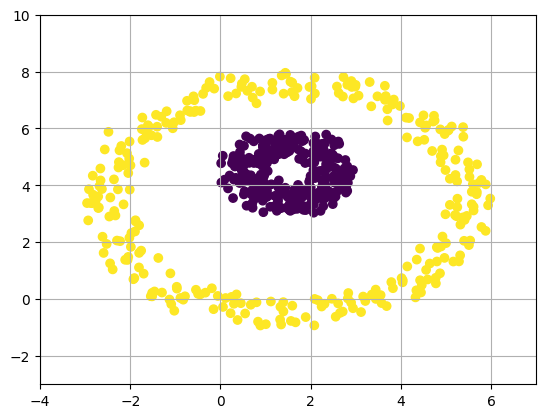

In [3]:
plt.scatter(Data[0],Data[1],c=Data[2])
plt.xlim([-4,7])
plt.ylim([-3,10])
plt.grid()

In [4]:
#normalization
Data[[0,1]]=StandardScaler().fit_transform(Data[[0,1]])
#Data Split
X_train, X_test, Y_train, Y_test=train_test_split(Data[[0,1]], Data[2], test_size=0.3, random_state=42)


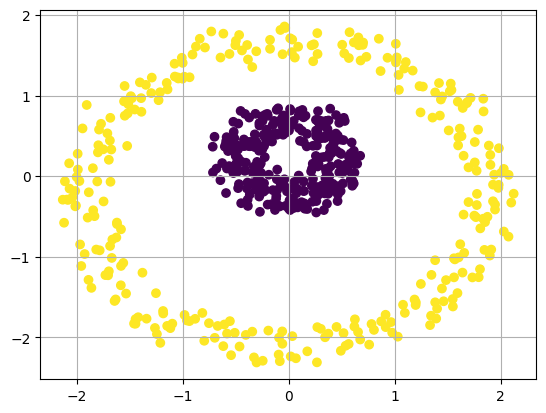

In [5]:
plt.scatter(Data[0],Data[1],c=Data[2])

plt.grid()

#MLP Classifier - No hidden layer

https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

              precision    recall  f1-score   support

         0.0       0.61      0.68      0.64       218
         1.0       0.61      0.53      0.57       202

    accuracy                           0.61       420
   macro avg       0.61      0.61      0.61       420
weighted avg       0.61      0.61      0.61       420

              precision    recall  f1-score   support

         0.0       0.57      0.78      0.66        82
         1.0       0.73      0.50      0.59        98

    accuracy                           0.63       180
   macro avg       0.65      0.64      0.63       180
weighted avg       0.66      0.63      0.62       180



(-5.0, 5.0)

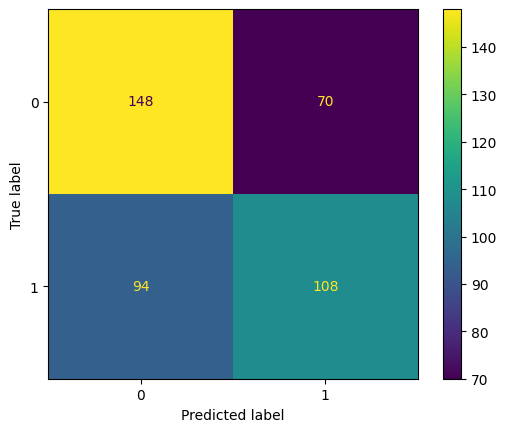

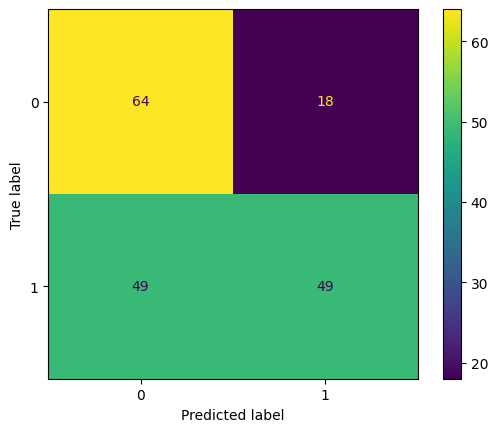

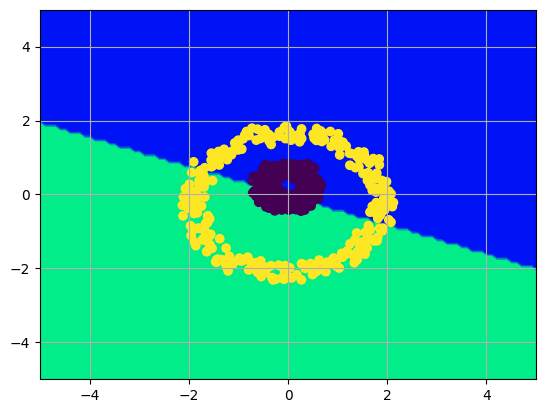

In [6]:
Model=MLPClassifier(hidden_layer_sizes=(),max_iter=1000)
Model.fit(X_train,Y_train)

print(classification_report(Y_train,Model.predict(X_train)))
ConfusionMatrixDisplay(confusion_matrix(Y_train,Model.predict(X_train))).plot()
print(classification_report(Y_test,Model.predict(X_test)))
ConfusionMatrixDisplay(confusion_matrix(Y_test,Model.predict(X_test))).plot()

plt.figure()
data_grid = np.array([np.meshgrid([np.arange(-10,10,0.1)],np.arange(-10,10,0.1))]).reshape(2, -1).T
plt.contourf(np.arange(-10,10,0.1),np.arange(-10,10,0.1),Model.predict(data_grid).reshape(np.arange(-10,10,0.1).shape[0],np.arange(-10,10,0.1).shape[0]),cmap='winter')
plt.scatter(Data[0],Data[1],c=Data[2])
plt.grid()
plt.xlim([-5,5])
plt.ylim([-5,5])

# MLP Classifier with Hidden layer (2 Perceptron)

              precision    recall  f1-score   support

         0.0       0.89      0.99      0.94       218
         1.0       0.99      0.87      0.93       202

    accuracy                           0.93       420
   macro avg       0.94      0.93      0.93       420
weighted avg       0.94      0.93      0.93       420

              precision    recall  f1-score   support

         0.0       0.77      0.99      0.87        82
         1.0       0.99      0.76      0.86        98

    accuracy                           0.86       180
   macro avg       0.88      0.87      0.86       180
weighted avg       0.89      0.86      0.86       180



(-5.0, 5.0)

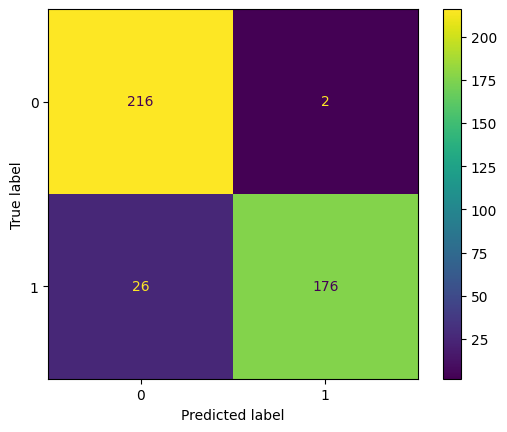

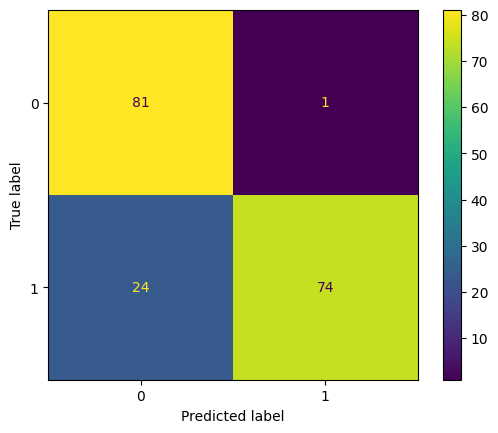

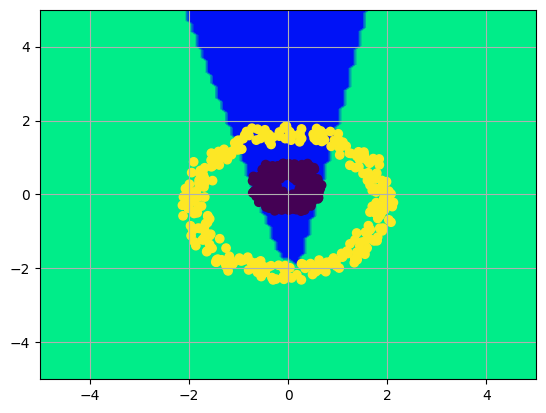

In [9]:
Model=MLPClassifier(hidden_layer_sizes=(2,),max_iter=1000000)
Model.fit(X_train,Y_train)

print(classification_report(Y_train,Model.predict(X_train)))
ConfusionMatrixDisplay(confusion_matrix(Y_train,Model.predict(X_train))).plot()
print(classification_report(Y_test,Model.predict(X_test)))
ConfusionMatrixDisplay(confusion_matrix(Y_test,Model.predict(X_test))).plot()

plt.figure()
data_grid = np.array([np.meshgrid([np.arange(-10,10,0.1)],np.arange(-10,10,0.1))]).reshape(2, -1).T
plt.contourf(np.arange(-10,10,0.1),np.arange(-10,10,0.1),Model.predict(data_grid).reshape(np.arange(-10,10,0.1).shape[0],np.arange(-10,10,0.1).shape[0]),cmap='winter')
plt.scatter(Data[0],Data[1],c=Data[2])
plt.grid()
plt.xlim([-5,5])
plt.ylim([-5,5])

In [ ]:
Model.coefs_,Model.intercepts_

([array([[-2.02493319, -1.41829573],
         [-0.54073418, -0.09149666]]), array([[ 4.28561631],
         [-1.92140103]])],
 [array([-0.3474298 ,  1.74780281]), array([1.16626822])])

In [ ]:
H1=np.maximum(Data[0]*Model.coefs_[0][0][0]+Data[1]*Model.coefs_[0][1][0]+Model.intercepts_[0][0],0)

In [ ]:
H2=np.maximum(Data[0]*Model.coefs_[0][0][1]+Data[1]*Model.coefs_[0][1][1]+Model.intercepts_[0][1],0)

In [ ]:
Hidden_Layer=pd.DataFrame(np.array([H1,H2]).T,columns=['H1', 'H2'] )

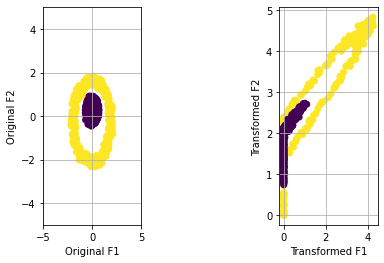

In [ ]:
plt.subplot(1,3,1)
plt.scatter(Data[0],Data[1],c=Data[2])
plt.xlim([-5,5])
plt.ylim([-5,5])
plt.xlabel('Original F1')
plt.ylabel('Original F2')
plt.grid()
plt.subplot(1,3,3)
plt.xlabel('Transformed F1')
plt.ylabel('Transformed F2')
plt.scatter(Hidden_Layer['H1'],Hidden_Layer['H2'],c=Data[2])
plt.grid()



# MLP Classifier with Hidden layer (3 Perceptron)

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       218
         1.0       1.00      1.00      1.00       202

    accuracy                           1.00       420
   macro avg       1.00      1.00      1.00       420
weighted avg       1.00      1.00      1.00       420

              precision    recall  f1-score   support

         0.0       0.95      1.00      0.98        82
         1.0       1.00      0.96      0.98        98

    accuracy                           0.98       180
   macro avg       0.98      0.98      0.98       180
weighted avg       0.98      0.98      0.98       180



(-5.0, 5.0)

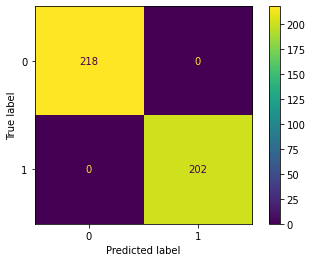

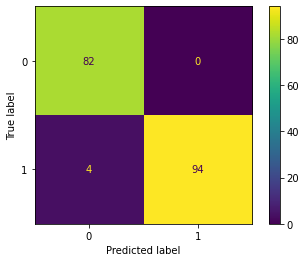

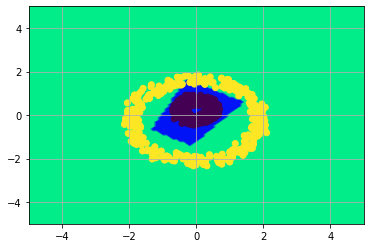

In [ ]:
Model=MLPClassifier(hidden_layer_sizes=(3,),max_iter=1000000)
Model.fit(X_train,Y_train)

print(classification_report(Y_train,Model.predict(X_train)))
ConfusionMatrixDisplay(confusion_matrix(Y_train,Model.predict(X_train))).plot()
print(classification_report(Y_test,Model.predict(X_test)))
ConfusionMatrixDisplay(confusion_matrix(Y_test,Model.predict(X_test))).plot()

plt.figure()
data_grid = np.array([np.meshgrid([np.arange(-10,10,0.1)],np.arange(-10,10,0.1))]).reshape(2, -1).T
plt.contourf(np.arange(-10,10,0.1),np.arange(-10,10,0.1),Model.predict(data_grid).reshape(np.arange(-10,10,0.1).shape[0],np.arange(-10,10,0.1).shape[0]),cmap='winter')
plt.scatter(Data[0],Data[1],c=Data[2])
plt.grid()
plt.xlim([-5,5])
plt.ylim([-5,5])

In [ ]:
df=pd.DataFrame(np.array([np.maximum(Data[0]*Model.coefs_[0][0][0]+Data[1]*Model.coefs_[0][1][0]+Model.intercepts_[0][0],0),
           np.maximum(Data[0]*Model.coefs_[0][0][1]+Data[1]*Model.coefs_[0][1][1]+Model.intercepts_[0][1],0),
           np.maximum(Data[0]*Model.coefs_[0][0][2]+Data[1]*Model.coefs_[0][1][2]+Model.intercepts_[0][2],0),Data[2]]).T,columns=['F1', 'F2', 'F3','label'] )


3D Plotting:

https://plotly.com/python/3d-scatter-plots/#basic-3d-scatter-plot

In [ ]:
import plotly.express as px
fig = px.scatter_3d(df, x='F1', y='F2', z='F3', color='label')

fig.show()

#Logistic Regression on Transformed Features

We want to see if data is linearly sepratable?!

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       218
         1.0       1.00      1.00      1.00       202

    accuracy                           1.00       420
   macro avg       1.00      1.00      1.00       420
weighted avg       1.00      1.00      1.00       420

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        82
         1.0       1.00      1.00      1.00        98

    accuracy                           1.00       180
   macro avg       1.00      1.00      1.00       180
weighted avg       1.00      1.00      1.00       180



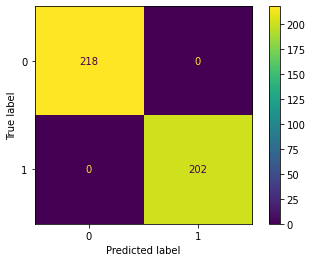

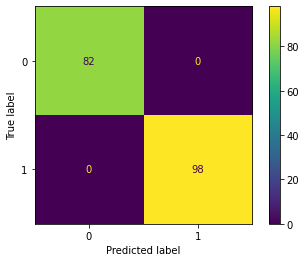

In [ ]:
df_train=pd.DataFrame(np.array([np.maximum(X_train[0]*Model.coefs_[0][0][0]+X_train[1]*Model.coefs_[0][1][0]+Model.intercepts_[0][0],0),
           np.maximum(X_train[0]*Model.coefs_[0][0][1]+X_train[1]*Model.coefs_[0][1][1]+Model.intercepts_[0][1],0),
           np.maximum(X_train[0]*Model.coefs_[0][0][2]+X_train[1]*Model.coefs_[0][1][2]+Model.intercepts_[0][2],0),Y_train]).T,columns=['F1', 'F2', 'F3','label'] )

df_test=pd.DataFrame(np.array([np.maximum(X_test[0]*Model.coefs_[0][0][0]+X_test[1]*Model.coefs_[0][1][0]+Model.intercepts_[0][0],0),
           np.maximum(X_test[0]*Model.coefs_[0][0][1]+X_test[1]*Model.coefs_[0][1][1]+Model.intercepts_[0][1],0),
           np.maximum(X_test[0]*Model.coefs_[0][0][2]+X_test[1]*Model.coefs_[0][1][2]+Model.intercepts_[0][2],0),Y_test]).T,columns=['F1', 'F2', 'F3','label'] )

Model2=LogisticRegression()
Model2.fit(df_train[['F1','F2','F3']],Y_train)

print(classification_report(Y_train,Model2.predict(df_train[['F1','F2','F3']])))
ConfusionMatrixDisplay(confusion_matrix(Y_train,Model2.predict(df_train[['F1','F2','F3']]))).plot()
print(classification_report(Y_test,Model2.predict(df_test[['F1','F2','F3']])))
ConfusionMatrixDisplay(confusion_matrix(Y_test,Model2.predict(df_test[['F1','F2','F3']]))).plot()

#Final Remarks

*   Single Layer Perceptron and Logistic Regression are both linear classifiers
*   Multi-Layer Perceptron is an automated feature transformer
*   Training MLP is more challenging than training Logistic Regression, you may get different results based on different weight initiations, activation functions selected and so many other things!

